In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.lines as mlines

import gsw

In [3]:
ds1= xr.open_dataset('L0-timeseries/wam_sbus_461_Nov_Dec_Jan.nc')
mask = ds1["pressure"].notnull()          # DataArray[bool] over time
ds1 = ds1.isel(time=mask)                # keep only True positions

ds2= xr.open_dataset('../unit-1230_Nov_Jan/L0-timeseries/wam_sbus_1230_Nov_Dec_Jan.nc')
mask = ds2["pressure"].notnull()          # DataArray[bool] over time
ds2 = ds2.isel(time=mask)                # keep only True positions

In [20]:
def dmm_to_decimal_xr(da: xr.DataArray) -> xr.DataArray:
    """
    Convert degrees & decimal minutes (DMM) in an xarray DataArray
    to decimal degrees.
    Example value: -3219.288051
    """
    sign = xr.where(da < 0, -1, 1)
    abs_da = np.abs(da)

    degrees = (abs_da // 100).astype(int)
    minutes = abs_da - (degrees * 100)

    decimal = degrees + minutes / 60.0
    return sign * decimal


In [23]:
ds1['latitude_fix']=dmm_to_decimal_xr(ds1.latitude.values)
ds1['longitude_fix']=dmm_to_decimal_xr(ds1.longitude.values)


In [51]:
ds2['latitude_fix']=dmm_to_decimal_xr(ds2.latitude.values)
ds2['longitude_fix']=dmm_to_decimal_xr(ds2.longitude.values)


In [25]:
# ds1['latitude_fix']

In [4]:
def grid2d(x, y, v, xi=1, yi=1, fn='median'):
    if np.size(xi) == 1:
        xi = np.arange(np.nanmin(x), np.nanmax(x)+xi, xi)
    if np.size(yi) == 1:
        yi = np.arange(np.nanmin(y), np.nanmax(y)+yi, yi)

    raw = pd.DataFrame({'x':x,'y':y,'v':v}).dropna()

    grid = np.full([np.size(yi),np.size(xi)], np.nan)
    
    raw['xbins'],xbin_iter = pd.cut(raw.x, xi,retbins=True,labels=False)
    raw['ybins'],ybin_iter = pd.cut(raw.y, yi,retbins=True,labels=False)

    _tmp = raw.groupby(['xbins','ybins'])['v'].agg(fn)
    grid[_tmp.index.get_level_values(1).astype(int),_tmp.index.get_level_values(0).astype(int)] = _tmp.values

    XI,YI = np.meshgrid(xi, yi, indexing='ij')
    return grid,XI.T,YI.T

In [45]:
taxis= np.arange(np.datetime64("2025-11-19"), np.datetime64("2026-01-31"), np.timedelta64(1, "h"))
yaxis=np.arange(0,1000,999)
time = ds1.time.values
pres = ds1.pressure.values

prof_num = ds1.profile_index.values
latitude_1=ds1.latitude_fix.values
longitude_1=ds1.longitude_fix.values
lat1, tt, zz=grid2d(prof_num, pres, latitude_1, xi=1, yi=yaxis, fn='mean')
lon1, tt, zz=grid2d(prof_num, pres, longitude_1, xi=1, yi=yaxis, fn='mean')

In [52]:
time = ds2.time.values
pres = ds2.pressure.values

In [53]:
prof_num = ds2.profile_index.values
latitude_2=ds2.latitude_fix.values
longitude_2=ds2.longitude_fix.values
lat2, tt, zz=grid2d(prof_num, pres, latitude_2, xi=1, yi=yaxis, fn='mean')
lon2, tt, zz=grid2d(prof_num, pres, longitude_2, xi=1, yi=yaxis, fn='mean')

In [57]:
wg_latlon=pd.read_csv('C:/Users/estel/Downloads/FrankenGlider_Weather_WAM.csv')

In [60]:
# 


In [12]:
df_bat= xr.open_dataset('C:/Users/estel/Dropbox/SOCCO-UCT/Datasets/supplementary/gebco_sbus.nc')

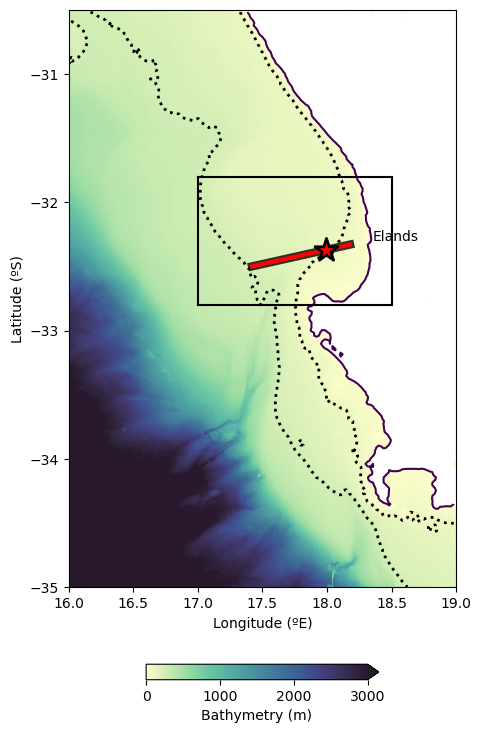

In [134]:
ff=plt.figure(figsize=(5,10))

cbbath=plt.pcolormesh(df_bat.lon,df_bat.lat, -df_bat.elevation, cmap=cmo.deep, vmin=0, vmax=3000,  zorder=1)
plt.colorbar(orientation='horizontal', extend='max', label='Bathymetry (m)', pad=0.1,shrink=0.6,  aspect=15, )
plt.contourf(df_bat.lon,df_bat.lat, df_bat.elevation,  levels=[-1,1000], alpha=1, colors='w', zorder=1)
plt.contour(df_bat.lon[::5],df_bat.lat[::5],df_bat.elevation[::5, ::5],levels=[0], linewidths=1.5, zorder=1)
plt.contour(df_bat.lon[::5],df_bat.lat[::5],df_bat.elevation[::5, ::5],levels=[-250, -100], linewidths=2, linestyles=':', colors='k', zorder=1)


plt.plot([17.420, 18.178667], [-32.5,-32.329833], c='k', alpha=0.8, lw=6)
plt.plot([17.420, 18.178667], [-32.5,-32.329833], c='red', alpha=1, lw=3)

plt.scatter(17.991500, -32.368667, s=300, marker='*', color='red', edgecolor='k', linewidth=2, zorder=10000) ## VM

# plt.scatter(lon,lat, s=1, zorder=100)
# plt.scatter(lon2,lat2, s=1, zorder=100)
# plt.scatter(wg_latlon.Longitude,wg_latlon.Latitude, s=1, zorder=100)
plt.xlim(16, 19)
# plt.ylim(-32.8, -31.8)

plt.ylabel('Latitude (ºS)')
plt.xlabel('Longitude (ºE)')
plt.text(18.35, -32.3, s='Elands')


plt.plot([17, 18.5],[-31.8,-31.8], c='k')
plt.plot([17, 18.5],[-32.8,-32.8], c='k')
plt.plot([17, 17],[-31.8,-32.8], c='k')
plt.plot([18.5, 18.5],[-31.8,-32.8], c='k')



Text(18.35, -32.3, 'Elands')

C:\Users\estel\miniconda3\envs\gliderwork\Lib\site-packages\IPython\core\events.py:96: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


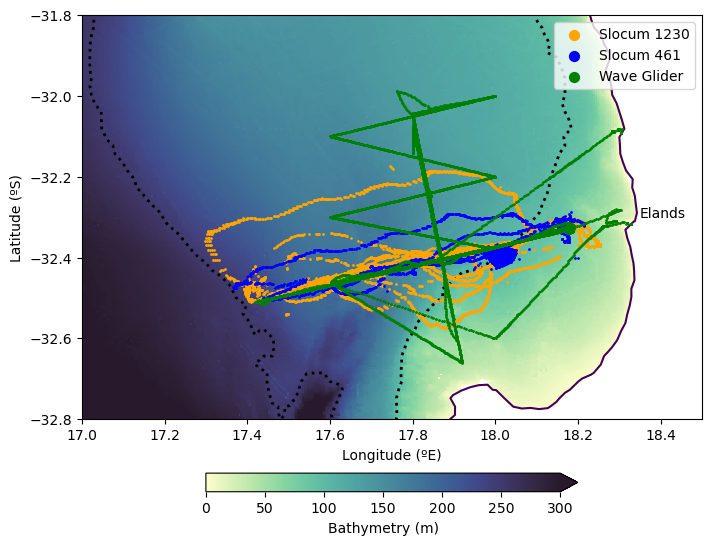

In [135]:
ff=plt.figure(figsize=(8,7))

cbbath=plt.pcolormesh(df_bat.lon,df_bat.lat, -df_bat.elevation, cmap=cmo.deep, vmin=0, vmax=300,  zorder=1)
plt.colorbar(orientation='horizontal', extend='max', label='Bathymetry (m)', pad=0.1,shrink=0.6,  aspect=20, )
plt.contourf(df_bat.lon,df_bat.lat, df_bat.elevation,  levels=[-1,1000], alpha=1, colors='w', zorder=1)
plt.contour(df_bat.lon[::5],df_bat.lat[::5],df_bat.elevation[::5, ::5],levels=[0], linewidths=1.5, zorder=1)
plt.contour(df_bat.lon[::5],df_bat.lat[::5],df_bat.elevation[::5, ::5],levels=[-250, -100], linewidths=2, linestyles=':', colors='k', zorder=1)


# plt.plot([17.420, 18.178667], [-32.5,-32.329833], c='k', alpha=0.8, lw=4)
# plt.scatter(17.991500, -32.376667, s=300, marker='*', color='yellow', edgecolor='k', zorder=10000) ## VM

plt.scatter(lon2,lat2, s=1, zorder=100,c='orange')
plt.scatter(lon,lat, s=1, zorder=100, c='blue')
plt.scatter(wg_latlon.Longitude,wg_latlon.Latitude, s=1, c='green', zorder=100)
plt.xlim(17, 18.5)
plt.ylim(-32.8, -31.8)
plt.ylabel('Latitude (ºS)')
plt.xlabel('Longitude (ºE)')

plt.scatter(0,0, s=50,  c='orange',label='Slocum 1230')
plt.scatter(0,0, s=50,  c='blue',label='Slocum 461')
plt.scatter(0,0, s=50,  c='green',label='Wave Glider')


plt.legend()

plt.text(18.35, -32.3, s='Elands')